# Setup

In [1]:
import os
import sys
from pathlib import Path

# Add source directory to system path
source_dir = str(Path(os.getcwd()).parent / 'src')
sys.path.append(source_dir)

# Dataset

10
Data(x=[75, 3], edge_index=[2, 5550], y=[1], pos=[75, 2])
Label: 1


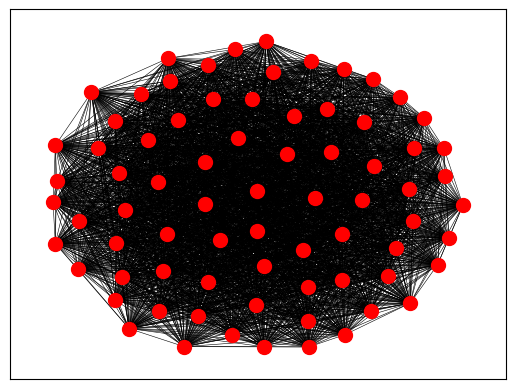

In [2]:

import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from torch_geometric.utils import to_networkx
from data import CIFAR10Superpixels


root = str(Path(os.getcwd()).parent / 'data' / 'cifar10-superpixels')
trainset = CIFAR10Superpixels(root=root)
# testset = CIFAR10Superpixels(root=root, train=False)
sample = trainset[int(np.random.sample()*len(trainset))]
print(trainset.num_classes)
print(sample)
print("Label: {}".format(sample.y[0].cpu().numpy()))
G = to_networkx(sample, to_undirected=True)
nx.draw_networkx(G, with_labels=False, node_size=100, node_color="red", width=0.4)

# Model (GraphSAGE)

In [3]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 256
numLayers = 2
convLayerType = 'sage'
dropout = 0.5

model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 335114
GNN(
  (convs): ModuleList(
    (0): GraphSage(3, 256)
    (1): GraphSage(256, 256)
    (2): GraphSage(256, 256)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [4]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'graphsage_cifar', model, optimizer, replace=True)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/graphsage_cifar
Number of Saved Checkpoints Found: 0


100%|██████████| 665/665 [00:25<00:00, 26.56it/s]


Epoch 0 | Training Loss: 8.58806 | Train Acc.: 0.2336 | Valid Acc.: 0.2711


100%|██████████| 665/665 [00:23<00:00, 28.47it/s]


Epoch 1 | Training Loss: 1.95017 | Train Acc.: 0.2788 | Valid Acc.: 0.2875


100%|██████████| 665/665 [00:23<00:00, 28.27it/s]


Epoch 2 | Training Loss: 1.89192 | Train Acc.: 0.3080 | Valid Acc.: 0.3051


100%|██████████| 665/665 [00:23<00:00, 28.74it/s]


Epoch 3 | Training Loss: 1.84510 | Train Acc.: 0.3260 | Valid Acc.: 0.3271


100%|██████████| 665/665 [00:22<00:00, 29.17it/s]


Epoch 4 | Training Loss: 1.81987 | Train Acc.: 0.3370 | Valid Acc.: 0.3627


100%|██████████| 665/665 [00:22<00:00, 29.10it/s]


Epoch 5 | Training Loss: 1.80110 | Train Acc.: 0.3496 | Valid Acc.: 0.3365


100%|██████████| 665/665 [00:22<00:00, 29.15it/s]


Epoch 6 | Training Loss: 1.80501 | Train Acc.: 0.3492 | Valid Acc.: 0.3309


100%|██████████| 665/665 [00:22<00:00, 29.14it/s]


Epoch 7 | Training Loss: 1.79703 | Train Acc.: 0.3529 | Valid Acc.: 0.3072


100%|██████████| 665/665 [00:22<00:00, 29.30it/s]


Epoch 8 | Training Loss: 1.79399 | Train Acc.: 0.3546 | Valid Acc.: 0.3261


100%|██████████| 665/665 [00:23<00:00, 28.64it/s]


Epoch 9 | Training Loss: 1.80388 | Train Acc.: 0.3558 | Valid Acc.: 0.2919


100%|██████████| 665/665 [00:23<00:00, 28.42it/s]


Epoch 10 | Training Loss: 1.79675 | Train Acc.: 0.3568 | Valid Acc.: 0.2968


100%|██████████| 665/665 [00:23<00:00, 28.23it/s]


Epoch 11 | Training Loss: 1.79019 | Train Acc.: 0.3590 | Valid Acc.: 0.3348


100%|██████████| 665/665 [00:23<00:00, 28.60it/s]


Epoch 12 | Training Loss: 1.82620 | Train Acc.: 0.3524 | Valid Acc.: 0.3065


100%|██████████| 665/665 [00:23<00:00, 27.92it/s]


Epoch 13 | Training Loss: 1.79510 | Train Acc.: 0.3626 | Valid Acc.: 0.3480


 75%|███████▌  | 501/665 [00:18<00:05, 27.47it/s]


KeyboardInterrupt: 

In [9]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'graphsage', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/graphsage
Number of Saved Checkpoints Found: 11
Testing Acc.: 0.8307


# Model (GAT)

In [15]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 4
convLayerType = 'gat'
dropout = 0.2
model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout, heads=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 60746
GNN(
  (convs): ModuleList(
    (0): GAT(1, 64)
    (1): GAT(128, 64)
    (2): GAT(128, 64)
    (3): GAT(128, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


In [17]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat', model, optimizer, replace=False)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat
Number of Saved Checkpoints Found: 10


100%|██████████| 797/797 [00:22<00:00, 35.16it/s]


Epoch 91 | Training Loss: 0.92782 | Train Acc.: 0.6918 | Valid Acc.: 0.3507


100%|██████████| 797/797 [00:22<00:00, 36.23it/s]


Epoch 92 | Training Loss: 0.90293 | Train Acc.: 0.7042 | Valid Acc.: 0.3776


100%|██████████| 797/797 [00:21<00:00, 36.63it/s]


Epoch 93 | Training Loss: 0.91029 | Train Acc.: 0.6986 | Valid Acc.: 0.7118


100%|██████████| 797/797 [00:21<00:00, 36.76it/s]


Epoch 94 | Training Loss: 0.90343 | Train Acc.: 0.7022 | Valid Acc.: 0.6864


100%|██████████| 797/797 [00:22<00:00, 35.60it/s]


Epoch 95 | Training Loss: 0.92032 | Train Acc.: 0.6985 | Valid Acc.: 0.6647


100%|██████████| 797/797 [00:22<00:00, 36.13it/s]


Epoch 96 | Training Loss: 0.92741 | Train Acc.: 0.6958 | Valid Acc.: 0.7001


100%|██████████| 797/797 [00:22<00:00, 35.88it/s]


Epoch 97 | Training Loss: 0.93910 | Train Acc.: 0.6897 | Valid Acc.: 0.7018


100%|██████████| 797/797 [00:22<00:00, 35.66it/s]


Epoch 98 | Training Loss: 0.93247 | Train Acc.: 0.6901 | Valid Acc.: 0.3740


100%|██████████| 797/797 [00:22<00:00, 35.92it/s]


Epoch 99 | Training Loss: 0.94149 | Train Acc.: 0.6883 | Valid Acc.: 0.4128


100%|██████████| 797/797 [00:22<00:00, 36.16it/s]


Epoch 100 | Training Loss: 0.92266 | Train Acc.: 0.6957 | Valid Acc.: 0.1446


100%|██████████| 797/797 [00:22<00:00, 36.09it/s]


Epoch 101 | Training Loss: 0.94024 | Train Acc.: 0.6888 | Valid Acc.: 0.6704


100%|██████████| 797/797 [00:22<00:00, 34.70it/s]


Epoch 102 | Training Loss: 0.92448 | Train Acc.: 0.6958 | Valid Acc.: 0.6853


100%|██████████| 797/797 [00:22<00:00, 35.62it/s]


Epoch 103 | Training Loss: 0.93046 | Train Acc.: 0.6909 | Valid Acc.: 0.6807


100%|██████████| 797/797 [00:22<00:00, 36.02it/s]


Epoch 104 | Training Loss: 0.93182 | Train Acc.: 0.6913 | Valid Acc.: 0.6096


100%|██████████| 797/797 [00:22<00:00, 35.59it/s]


Epoch 105 | Training Loss: 0.92859 | Train Acc.: 0.6918 | Valid Acc.: 0.4727


100%|██████████| 797/797 [00:22<00:00, 36.07it/s]


Epoch 106 | Training Loss: 0.93874 | Train Acc.: 0.6880 | Valid Acc.: 0.4983


100%|██████████| 797/797 [00:22<00:00, 34.80it/s]


Epoch 107 | Training Loss: 0.93403 | Train Acc.: 0.6898 | Valid Acc.: 0.4723


100%|██████████| 797/797 [00:21<00:00, 36.99it/s]


Epoch 108 | Training Loss: 0.92683 | Train Acc.: 0.6917 | Valid Acc.: 0.3316


100%|██████████| 797/797 [00:21<00:00, 36.91it/s]


Epoch 109 | Training Loss: 0.95790 | Train Acc.: 0.6834 | Valid Acc.: 0.7396


100%|██████████| 797/797 [00:21<00:00, 36.96it/s]


Epoch 110 | Training Loss: 0.94144 | Train Acc.: 0.6867 | Valid Acc.: 0.5960


100%|██████████| 797/797 [00:22<00:00, 35.73it/s]


Epoch 111 | Training Loss: 0.93361 | Train Acc.: 0.6940 | Valid Acc.: 0.7060


 35%|███▍      | 275/797 [00:08<00:15, 34.27it/s]


KeyboardInterrupt: 

In [18]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat
Number of Saved Checkpoints Found: 12
Testing Acc.: 0.5725
